##Problem Statement:

The primary goal of this data analysis project is to gain insights into Twitter conversations related to Bitcoin and various altcoins and to assess how sentiment in these tweets may be associated with cryptocurrency price movements.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Loading

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DAV Project/datewise2022.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

target_month = 1

# Filtering data for the specified month
data_for_month = data[data['Date'].dt.month == target_month]

# Display the resulting DataFrame for the specified month
print(data_for_month.tail(5))


         Unnamed: 0       Date             User  \
1488067     1488067 2022-01-31      deyonte_btc   
1488068     1488068 2022-01-31      Baripondiss   
1488069     1488069 2022-01-31     galaxy_orion   
1488070     1488070 2022-01-31  BitcoinFeesCash   
1488071     1488071 2022-01-31          inanksm   

                                                     Tweet  Subjectivity  \
1488067  one largest asset managers planet with 10 tril...      0.717857   
1488068  lol oh you just realized youre still early wel...      0.633333   
1488069  i know he instruct his agency ban bitcoin russ...      0.666667   
1488070  updated bitcoin transaction fees bch next bloc...      0.000000   
1488071  is one most important inventions all human his...      0.533333   

         Polarity  Sentiment  Vader_Sentiment  
1488067 -0.107143  -0.071429          -0.5859  
1488068  0.566667   0.111111           0.7003  
1488069  0.200000   0.027027          -0.8020  
1488070  0.000000   0.000000          -0.812

In [ ]:
# Load the datewise bitcoin price dataset
bit_data = pd.read_csv('/content/drive/MyDrive/DAV Project/bitcoin_2022-01-01_2022-01-31.csv')
bit_data.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2022-01-31,2022-02-01,37913.239500,38669.258900,36692.124972,38472.006236,5.554980e+10,7.113510e+11
1,2022-01-30,2022-01-31,38161.929090,38287.754600,37412.248098,37937.339000,3.479342e+10,7.187560e+11
2,2022-01-29,2022-01-30,37741.928400,38577.996300,37369.209771,38131.823600,4.335900e+10,7.161947e+11
3,2022-01-28,2022-01-29,37062.964425,37929.944800,36168.927191,37784.722900,5.773464e+10,7.015914e+11
4,2022-01-27,2022-01-28,36786.693711,37201.842347,35519.974000,37201.842347,7.216674e+10,6.884229e+11


##Data Description

In [ ]:
data_for_month.shape

(1488072, 8)

In [ ]:
data_for_month.isnull().sum()

Unnamed: 0           0
Date                 0
User                 0
Tweet              215
Subjectivity         0
Polarity             0
Sentiment            0
Vader_Sentiment    215
dtype: int64

In [ ]:
bit_data.shape

(31, 8)

##Data Preprocessing

Feature Extraction

In [ ]:
data = data_for_month[['Date', 'User', 'Tweet']]
data

,Date,User,Tweet
0,2022-01-01,CryptoNerdApp,current price bitcoin 46320 1 85 btc more info...
1,2022-01-01,MadStudentScie1,generating misunderstanding bitcoin
2,2022-01-01,CryptoNerdApp,current price cardano 1 31 3 49 ada more infor...
3,2022-01-01,HourlyBTCUpdate,bitcoin 46197 31 122 01 last 1 hour 0 26 455 4...
4,2022-01-01,TrendSpider,btc continues bounce off ytd anchored vwap
...,...,...,...
1488067,2022-01-31,deyonte_btc,one largest asset managers planet with 10 tril...
1488068,2022-01-31,Baripondiss,lol oh you just realized youre still early wel...
1488069,2022-01-31,galaxy_orion,i know he instruct his agency ban bitcoin russ...
1488070,2022-01-31,BitcoinFeesCash,updated bitcoin transaction fees bch next bloc...


In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())

Date       0
User       0
Tweet    215
dtype: int64
83283


Handling Mising Values & Duplicates

In [ ]:
# Replace missing values in the "Date" column with the date above the row
data['Date'].fillna(method='ffill', inplace=True)

# Replace missing values in the "User" column with "User"
data['User'].fillna('User', inplace=True)

# Drop rows with missing values in the "Tweet" column
data.dropna(subset=['Tweet'], inplace=True)

#We are not dropping duplicate users

print(data.isnull().sum())
print(data.duplicated().sum())

<ipython-input-15-47b7b59a9d73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'].fillna(method='ffill', inplace=True)
<ipython-input-15-47b7b59a9d73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['User'].fillna('User', inplace=True)
<ipython-input-15-47b7b59a9d73>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Tweet'], inplace=True)


Date     0
User     0
Tweet    0
dtype: int64
83230


##Functions For Sentiment Analysis

In [ ]:
def sentiment(Tweet):
  sentence = Tweet
  blob = TextBlob(sentence)
  sentiment_score = blob.sentiment.polarity
  if sentiment_score > 0:
      sentiment = 'Positive'
  elif sentiment_score < 0:
      sentiment = 'Negative'
  else:
      sentiment = 'Neutral'
  return sentiment

In [ ]:
def sentiment_score(Tweet):
  sentence = Tweet
  blob = TextBlob(sentence)
  sentiment_score = blob.sentiment.polarity
  return sentiment_score

##Feature Engineering

In [ ]:
#Adding Sentiment col
data['Sentiment_TextBlob'] = data['Tweet'].apply(sentiment)
#Adding Sentiment Score col
data['Sentiment_score'] = data['Tweet'].apply(sentiment_score)
#Adding Tweet Length col
data['Tweet Length'] = data['Tweet'].apply(len)

<ipython-input-18-d4bc96cbc30e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_TextBlob'] = data['Tweet'].apply(sentiment)
<ipython-input-18-d4bc96cbc30e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_score'] = data['Tweet'].apply(sentiment_score)
<ipython-input-18-d4bc96cbc30e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
data.head()

,Date,User,Tweet,Sentiment_TextBlob,Sentiment_score,Tweet Length
0,2022-01-01,CryptoNerdApp,current price bitcoin 46320 1 85 btc more info...,Positive,0.25,67
1,2022-01-01,MadStudentScie1,generating misunderstanding bitcoin,Neutral,0.00,35
2,2022-01-01,CryptoNerdApp,current price cardano 1 31 3 49 ada more infor...,Positive,0.25,66
3,2022-01-01,HourlyBTCUpdate,bitcoin 46197 31 122 01 last 1 hour 0 26 455 4...,Neutral,0.00,106
4,2022-01-01,TrendSpider,btc continues bounce off ytd anchored vwap,Neutral,0.00,42


In [ ]:
data.describe()

,Sentiment_score,Tweet Length
count,1.487857e+06,1.487857e+06
mean,9.858781e-02,9.389415e+01
std,2.426269e-01,6.117638e+01
min,-1.000000e+00,1.000000e+00
25%,0.000000e+00,4.700000e+01
50%,0.000000e+00,7.900000e+01
75%,2.000000e-01,1.320000e+02
max,1.000000e+00,3.450000e+02


##Analysis


In [ ]:
# Grouping by 'Sentiment' and calculating count and mean of 'Tweet Length'
grouped_df = data.groupby('Sentiment_TextBlob').agg({
    'Sentiment_TextBlob': 'count',
    'Tweet Length': 'mean'
}).rename(columns={'Sentiment_TextBlob': 'Count', 'Tweet Length': 'Mean Tweet Length'}).reset_index()

# Displaying the grouped DataFrame
print(grouped_df)

  Sentiment_TextBlob   Count  Mean Tweet Length
0           Negative  223088         113.459854
1            Neutral  624573          64.820484
2           Positive  640196         115.440295


What insights can be drawn from the relationship between tweet sentiment (Negative, Neutral, Positive) and the mean tweet length? Are there noticeable patterns or trends in tweet length across different sentiment categories, and what implications might this have for understanding the emotional expression in tweets?

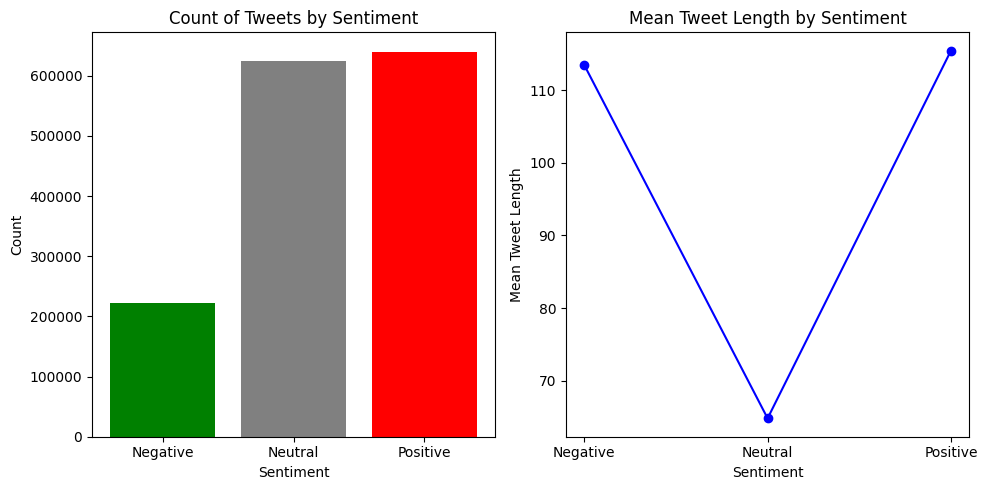

In [ ]:
# Create bar chart for count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(grouped_df['Sentiment_TextBlob'], grouped_df['Count'], color=['green', 'gray', 'red'])
plt.title('Count of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Create line plot for mean tweet length
plt.subplot(1, 2, 2)
plt.plot(grouped_df['Sentiment_TextBlob'], grouped_df['Mean Tweet Length'], marker='o', color='blue')
plt.title('Mean Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Tweet Length')

plt.tight_layout()
plt.show()

Observations:


*   The high count of "Neutral" tweets suggests that a significant portion of the discussion on Bitcoin may be neutral or informational in nature.
*   The longer mean length of "Positive" and "Negative" tweets could indicate that tweets expressing strong opinions or emotions tend to be more detailed.

*   It's important to consider the context of the sentiment analysis results. For example, a high count of "Negative" sentiment tweets may indicate concerns or criticisms related to Bitcoin, but further analysis is needed to understand the specific content and reasons behind the sentiment.







In [ ]:
# Sentiment Analysis
positive_percentage = (data['Sentiment_TextBlob'] == 'Positive').mean() * 100
neutral_percentage = (data['Sentiment_TextBlob'] == 'Neutral').mean() * 100
negative_percentage = (data['Sentiment_TextBlob'] == 'Negative').mean() * 100

# Display results
print("Positive Sentiment Percentage:", round(positive_percentage,2))
print("Neutral Sentiment Percentage:", round(neutral_percentage,2))
print("Negative Sentiment Percentage:", round(negative_percentage,2))


Positive Sentiment Percentage: 43.03
Neutral Sentiment Percentage: 41.98
Negative Sentiment Percentage: 14.99


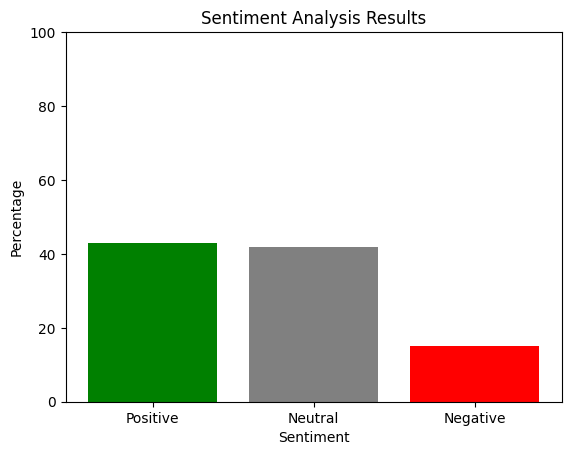

In [ ]:
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sentiment_percentages = [positive_percentage, neutral_percentage, negative_percentage]

plt.bar(sentiment_labels, sentiment_percentages, color=['green', 'gray', 'red'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()


The sentiment analysis of tweets on Bitcoin indicates a relatively balanced distribution, with approximately 43.03% expressing positive sentiments, 41.98% being neutral, and 14.99% conveying negative sentiments.

In [ ]:
# User Engagement
average_tweet_length = data['Tweet Length'].mean()

# Display result
print("\nAverage Tweet Length:", average_tweet_length)



Average Tweet Length: 93.894151790125


Top 5 influencer's tweets analysis

In [ ]:
# Define a function to get the top users based on the number of tweets
def top_users_by_tweets(df, n, user_column='User'):
    return df[user_column].value_counts().head(n).index

# Get the top 5 users
top_users = top_users_by_tweets(data, 5)

# Display behavior for each of the top users
for user in top_users:
    user_data = data[data['User'] == user]
    average_sentiment_score = user_data['Sentiment_score'].mean()
    most_common_sentiment = user_data['Sentiment_TextBlob'].mode().values[0]

    print(f"\nUser: {user}")
    print(f"Total Tweets: {len(user_data)}")
    print(f"Average Sentiment Score: {average_sentiment_score}")
    print(f"Most Common Sentiment: {most_common_sentiment}")



User: CryptoCapflow
Total Tweets: 33455
Average Sentiment Score: -0.005415732576097245
Most Common Sentiment: Neutral

User: bmurphypointman
Total Tweets: 19462
Average Sentiment Score: 0.038346121045740825
Most Common Sentiment: Neutral

User: Mr_Bitcoin_INU
Total Tweets: 11697
Average Sentiment Score: 0.11058870357499279
Most Common Sentiment: Positive

User: ExchangeWhales
Total Tweets: 11565
Average Sentiment Score: -0.0010246433203631648
Most Common Sentiment: Neutral

User: thepumpadvisor
Total Tweets: 8012
Average Sentiment Score: 0.20180895323681147
Most Common Sentiment: Positive


### Inferences:
- The majority of the top influencers exhibit a mix of neutral and positive sentiments in their tweets.
- "Mr_Bitcoin_INU" stands out with a higher average sentiment score, indicating a more consistently positive tone.
- "CryptoCapflow" and "ExchangeWhales" have a significant number of neutral tweets, suggesting an objective or informational approach.
- "thepumpadvisor" appears to have a higher proportion of positive sentiments, possibly indicating a more bullish or optimistic perspective.
- The most common sentiment for several influencers is neutral, emphasizing a balanced expression of opinions.

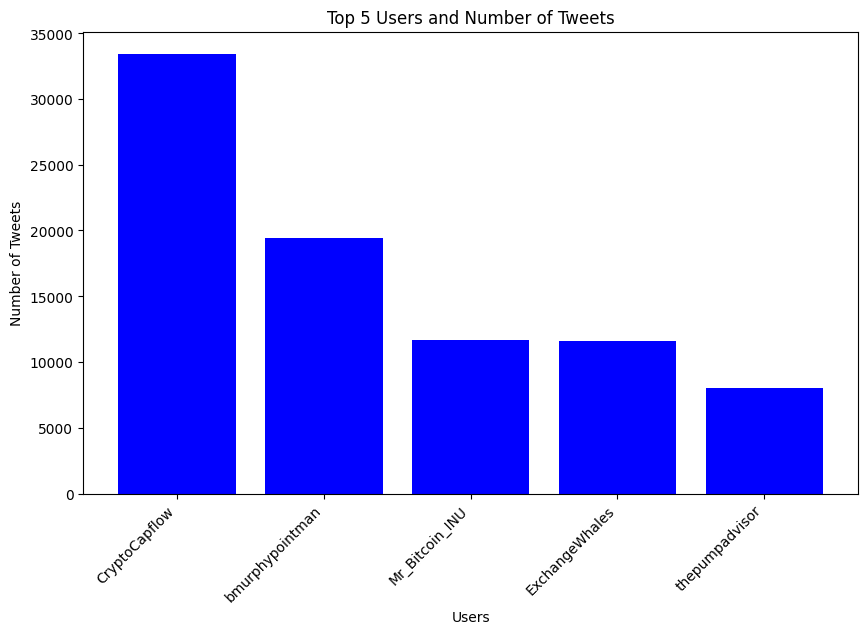

In [ ]:
# Create a bar chart for the number of tweets by top users
plt.figure(figsize=(10, 6))
plt.bar(top_users, data[data['User'].isin(top_users)]['User'].value_counts(), color='blue')
plt.title('Top 5 Users and Number of Tweets')
plt.xlabel('Users')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Extract rows where 'User' is in the list 'top_users'
filtered_df = data[data['User'].isin(list(top_users))]
filtered_df.head()

,Date,User,Tweet,Sentiment_TextBlob,Sentiment_score,Tweet Length
61,2022-01-01,bmurphypointman,purchases over 25 at,Neutral,0.000,20
62,2022-01-01,bmurphypointman,purchases over 25,Neutral,0.000,17
91,2022-01-01,ExchangeWhales,2 865 340 btcusdt longed 46 260 69 0 00 51 utc,Neutral,0.000,46
109,2022-01-01,CryptoCapflow,by 2021 12 31 14 00 gmt 1inch had price change...,Neutral,0.000,89
116,2022-01-01,CryptoCapflow,by 2021 12 31 15 00 gmt cro futures long rate ...,Negative,-0.025,74


In [ ]:
# Group by 'Date' and calculate the average sentiment score for each date of influencers
user_sentiment = filtered_df.groupby('Date')['Sentiment_score'].mean().reset_index()

# Display the resulting DataFrame
print(user_sentiment)

         Date  Sentiment_score
0  2022-01-01         0.001079
1  2022-01-02         0.007654
2  2022-01-03         0.008569
3  2022-01-04         0.000035
4  2022-01-05        -0.000741
5  2022-01-06         0.042987
6  2022-01-07         0.035390
7  2022-01-08         0.096033
8  2022-01-09         0.041781
9  2022-01-10         0.052695
10 2022-01-11         0.039008
11 2022-01-12         0.015210
12 2022-01-13         0.016113
13 2022-01-14         0.023860
14 2022-01-15         0.036853
15 2022-01-16         0.034824
16 2022-01-17         0.033043
17 2022-01-18         0.048910
18 2022-01-19         0.035777
19 2022-01-20         0.058623
20 2022-01-21         0.045080
21 2022-01-22         0.029317
22 2022-01-23         0.058982
23 2022-01-24         0.041840
24 2022-01-25         0.082023
25 2022-01-26         0.084076
26 2022-01-27         0.035463
27 2022-01-28         0.067872
28 2022-01-29         0.091938
29 2022-01-30         0.083719
30 2022-01-31         0.071559


### Observations:
- The sentiment scores for tweets from the top 5 influencers show a generally positive trend throughout the month.
- Fluctuations in sentiment are observed, with some days experiencing higher or lower sentiment.
- Days like January 8th, 9th, 10th, 18th, 20th, 25th, 26th, 28th, and 29th exhibit higher sentiment.
- Further analysis is needed to correlate sentiment scores with specific events or news related to Bitcoin.
- Towards the end of the month (January 30th and 31st), sentiment remains relatively positive, indicating potential stability.


Temporal Analysis

In [ ]:
# Temporal Analysis
data['Date'] = pd.to_datetime(data['Date'])
daily_sentiment = data.groupby('Date')['Sentiment_score'].mean()

# Display result
print("\nDaily Sentiment Trends:")
print(daily_sentiment)


Daily Sentiment Trends:
Date
2022-01-01    0.114292
2022-01-02    0.104379
2022-01-03    0.137353
2022-01-04    0.112046
2022-01-05    0.094586
2022-01-06    0.089266
2022-01-07    0.093399
2022-01-08    0.095967
2022-01-09    0.094522
2022-01-10    0.095416
2022-01-11    0.101085
2022-01-12    0.099903
2022-01-13    0.098898
2022-01-14    0.101109
2022-01-15    0.109258
2022-01-16    0.101766
2022-01-17    0.105723
2022-01-18    0.103058
2022-01-19    0.097058
2022-01-20    0.098120
2022-01-21    0.082492
2022-01-22    0.086336
2022-01-23    0.089243
2022-01-24    0.086989
2022-01-25    0.096140
2022-01-26    0.098498
2022-01-27    0.093785
2022-01-28    0.100665
2022-01-29    0.105445
2022-01-30    0.101139
2022-01-31    0.097766
Name: Sentiment_score, dtype: float64


<ipython-input-33-ef8ce0fb3fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


Daily User Sentiment Trends - January 2022

1. **Fluctuating Sentiment:**
   - Daily sentiment scores show fluctuations throughout the month, indicating varying levels of positive sentiment among users.

2. **No Clear Trend:**
   - There is no distinct upward or downward trend in daily sentiment scores, suggesting a dynamic and responsive sentiment environment.

3. **Notable High Sentiment Days:**
   - Some days, such as January 3rd, 15th, 17th, and 28th, exhibit relatively higher sentiment scores, potentially influenced by events or discussions.

4. **Overall Positive Sentiment:**
   - The overall sentiment appears to be positive, with most daily scores ranging between 0.08 and 0.14.

5. **Influence of Real-time Events:**
   - Fluctuations in sentiment may be influenced by real-time events, news, or discussions in the cryptocurrency space.

**Conclusion:**
The daily sentiment trends suggest a generally positive sentiment among Bitcoin users throughout January 2022, with fluctuations indicating a responsive sentiment environment influenced by real-time events.


In [ ]:
# Correlations
correlation_sentiment_length = data['Sentiment_score'].corr(data['Tweet Length'])

# Display result
print("\nCorrelation between Sentiment and Tweet Length:", correlation_sentiment_length)



Correlation between Sentiment and Tweet Length: 0.06279322243953996


The correlation coefficient of 0.0628 indicates a weak, positive relationship between sentiment and tweet length.


In [ ]:
bit_data_high = pd.DataFrame(bit_data['High'])
bit_data_high

,High
0,38669.258900
1,38287.754600
2,38577.996300
3,37929.944800
4,37201.842347
5,38891.825200
6,37434.676100
7,37205.164000
8,36411.915053
9,36690.317652


In [ ]:
# Group by 'Date' and calculate the mean sentiment score for all users
daily_mean_sentiment = data.groupby('Date')['Sentiment_score'].mean().reindex()
daily_mean_sentiment=pd.DataFrame(daily_mean_sentiment)
daily_mean_sentiment

,Sentiment_score
Date,
2022-01-01,0.114292
2022-01-02,0.104379
2022-01-03,0.137353
2022-01-04,0.112046
2022-01-05,0.094586
2022-01-06,0.089266
2022-01-07,0.093399
2022-01-08,0.095967
2022-01-09,0.094522


In [ ]:
daily_mean_sentiment = daily_mean_sentiment.reset_index(drop=True)

# Extract the 'Date' column from 'bit_data' if it's an index
bit_data['Date'] = bit_data.index

# Merge the two DataFrames based on the 'Date' column
merged_data = pd.concat([daily_mean_sentiment, bit_data[['Date', 'High']]], axis=1)

# Drop the 'Date' column if it's not needed in the final DataFrame
merged_data = merged_data.drop(columns='Date')

merged_data['High'] = merged_data['High']/450000


# Display the resulting DataFrame
print(merged_data)


    Sentiment_score      High
0          0.114292  0.085932
1          0.104379  0.085084
2          0.137353  0.085729
3          0.112046  0.084289
4          0.094586  0.082671
5          0.089266  0.086426
6          0.093399  0.083188
7          0.095967  0.082678
8          0.094522  0.080915
9          0.095416  0.081534
10         0.101085  0.091223
11         0.099903  0.096542
12         0.098898  0.094383
13         0.101109  0.094628
14         0.109258  0.095822
15         0.101766  0.096493
16         0.105723  0.097173
17         0.103058  0.096417
18         0.097058  0.098422
19         0.098120  0.098151
20         0.082492  0.095667
21         0.086336  0.093817
22         0.089243  0.094861
23         0.086989  0.093997
24         0.096140  0.095860
25         0.098498  0.097185
26         0.093785  0.104424
27         0.100665  0.105542
28         0.105445  0.105587
29         0.101139  0.106376
30         0.097766  0.106312


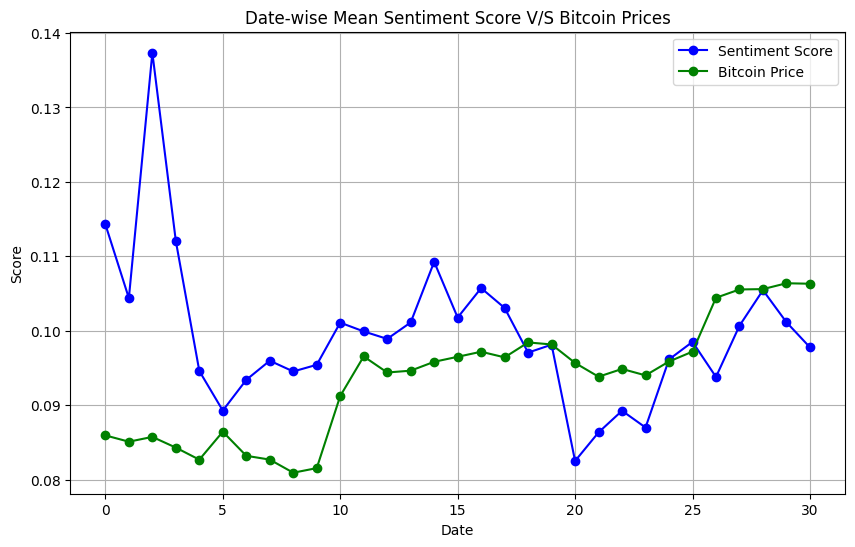

In [ ]:
# Plotting the line chart for sentiment
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_sentiment.index, merged_data['Sentiment_score'], marker='o', linestyle='-', color='b', label='Sentiment Score')
plt.plot(daily_mean_sentiment.index, merged_data['High'], marker='o', linestyle='-', color='g', label='Bitcoin Price/45000')
plt.title('Date-wise Mean Sentiment Score V/S Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
correlation_sentiment_price = merged_data['Sentiment_score'].corr(merged_data['High'])
correlation_sentiment_price

-0.09840218484019105

The correlation coefficient of -0.0984 suggests a weak negative relationship between user sentiment scores and high prices of Bitcoin. This indicates that changes in sentiment have a limited impact on Bitcoin prices, with other factors likely influencing market behavior more significantly.


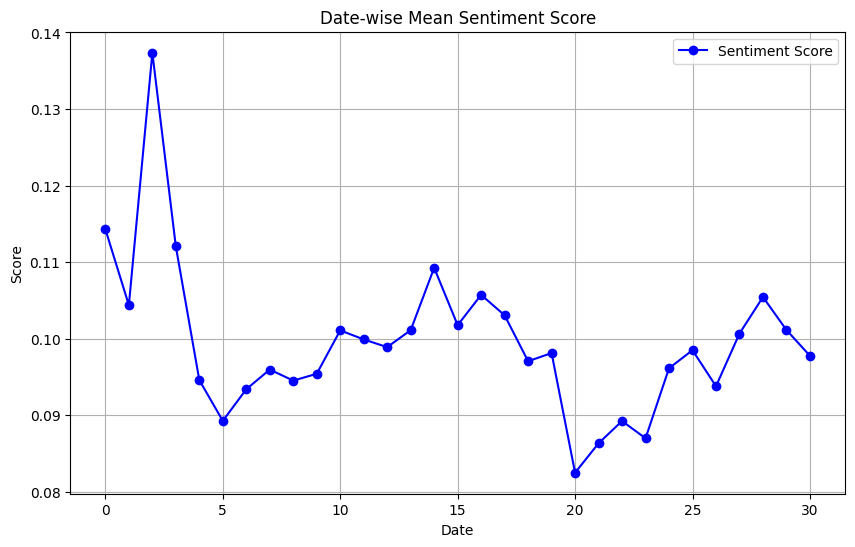

In [ ]:
# Plotting the line chart for sentiment
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_sentiment.index, daily_mean_sentiment, marker='o', linestyle='-', color='b', label='Sentiment Score')
plt.title('Date-wise Mean Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

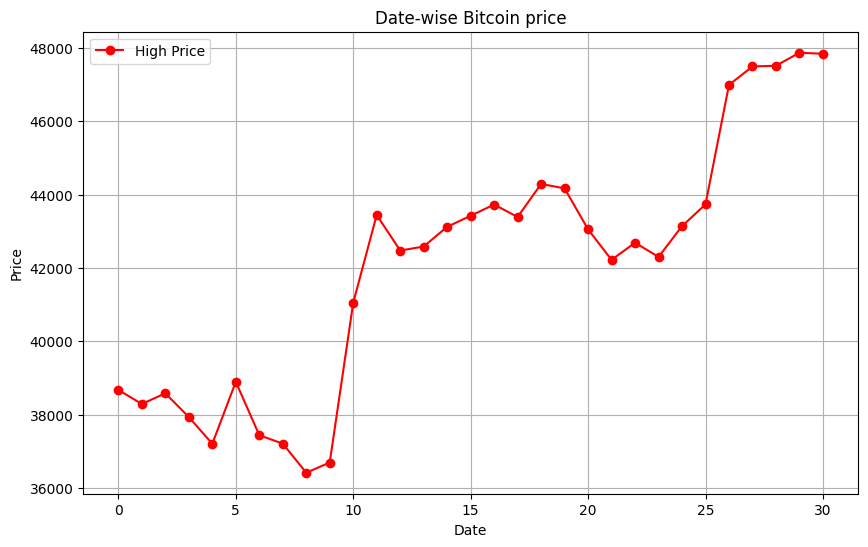

In [ ]:
# Plotting the 'High' column for price
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_sentiment.index,bit_data['High'], marker='o', linestyle='-', color='r', label='High Price')
plt.title('Date-wise Bitcoin price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

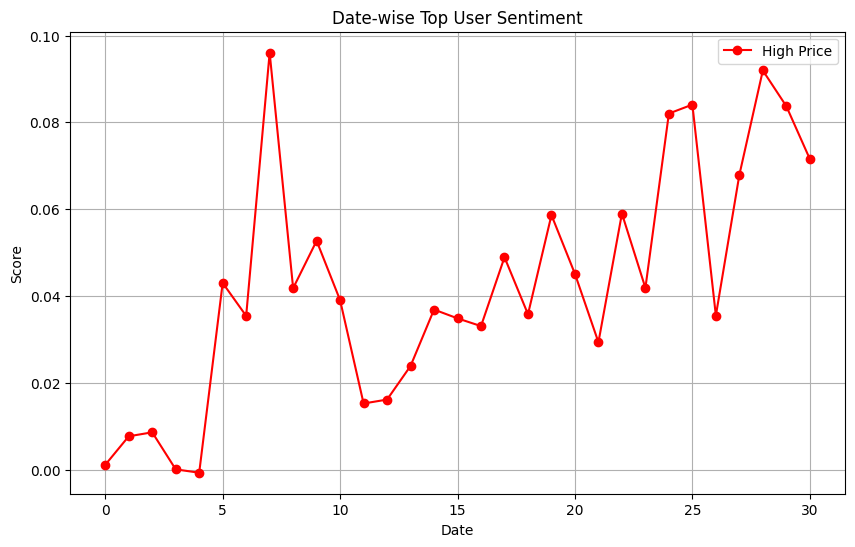

In [ ]:
# Plotting the 'High' column for price
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_sentiment.index,user_sentiment['Sentiment_score'], marker='o', linestyle='-', color='r', label='High Price')
plt.title('Date-wise Top User Sentiment')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
correlation_Top_sentiment_price = user_sentiment['Sentiment_score'].corr(bit_data['High'])
correlation_Top_sentiment_price

0.46360125803372076

A correlation coefficient of 0.4636 indicates a moderate positive relationship between the sentiment of the top 5 influencers and high prices of Bitcoin. This suggests that, to some extent, positive sentiment from these influencers may coincide with higher Bitcoin prices.


In this project, we conducted sentiment analysis on Bitcoin-related tweets, considering both general user sentiment and sentiments expressed by the top 5 influencers. The analysis revealed a generally positive sentiment among users, with fluctuations observed throughout the month. The sentiment of top influencers showed a moderate positive correlation with high prices of Bitcoin, implying a potential influence of their sentiments on market behavior. However, it's crucial to note that correlation does not imply causation, and other external factors may also contribute to Bitcoin price movements.
